In [1]:
import os
import scipy.io as sio
directory = '/kaggle/input/eeg-datasettt-2/Dataset-2/Alzhimer/CONTROL'
file_list = [file for file in os.listdir(directory) if file.endswith('.mat')]
Normal = []
for file in file_list:
    file_path = os.path.join(directory, file)
    mat_data = sio.loadmat(file_path)
    Normal.append(mat_data)

In [2]:
import numpy as np
Normal_data = []
for i in range(len(Normal)):
    try:
        data = Normal[i]['segmenty']
        Normal_data.append(data)
    except:
        data = Normal[i]['export']
        data = np.transpose(data)
        Normal_data.append(data)
        
Normal_data = [lst[0:19] for lst in Normal_data]

# for i in range(len(Normal_data)):
#   print(np.array(Normal_data[i]).shape)

In [3]:
data_path='/kaggle/input/eeg-datasettt-2/Dataset-2/Alzhimer/MCI'
MCI = []
for file in os.listdir(data_path):
    file_path = os.path.join(data_path, file)
    for i in os.listdir(file_path):
        file_pa = os.path.join(file_path, i)
        mat_data = sio.loadmat(file_pa)
        MCI.append(mat_data)

In [4]:
MCI_data = []
for i in range(len(MCI)):
    data = MCI[i]['export']
    data = np.transpose(data)
    MCI_data.append(data)

# for i in range(len(MCI_data)):
#     print(np.array(MCI_data[i]).shape)

In [5]:
data_path='/kaggle/input/eeg-datasettt-2/Dataset-2/Alzhimer/AD'
AD = []
for file in os.listdir(data_path):
    file_path = os.path.join(data_path, file)
    for i in os.listdir(file_path):
        file_pa = os.path.join(file_path, i)
        mat_data = sio.loadmat(file_pa)
        AD.append(mat_data)

In [6]:
AD_data = []
for i in range(len(AD)):
    data = AD[i]['export']
    data = np.transpose(data)
    AD_data.append(data)

desired_length = 19
AD_data = [arr for arr in AD_data if len(arr) == desired_length]

# for i in range(len(AD_data)):
#     print(np.array(AD_data[i]).shape)

In [7]:
import numpy as np
Data = []
label = []
for i in range(len(Normal_data)):
  Data.append(Normal_data[i])
  label.append(0)

for j in range(len(MCI_data)):
  Data.append(MCI_data[j])
  label.append(1)

for k in range(len(AD_data)):
  Data.append(AD_data[k])
  label.append(2)
    
print(len(Data))
print(len(label))

461
461


In [8]:
Ndata=[]
for i in  range(len(Data)):
    std=np.std(Data[i],axis=1)
    mean=np.mean(Data[i],axis=1)
    Data[i]=(Data[i].transpose()-mean.transpose()).transpose()
    Data[i]=(Data[i].transpose()/std.transpose()).transpose()
    Ndata.append(Data[i])

/tmp/ipykernel_263/1669137390.py:6: RuntimeWarning: invalid value encountered in divide
  Data[i]=(Data[i].transpose()/std.transpose()).transpose()


In [9]:
winSize = 256*4
stride = 256*1
WData_ch1 = []
Nlabel = []
for j in range(len(Ndata)):
    count = 0
    for i in range(0,np.shape(Ndata[j])[1]-winSize,stride):
        count+=1
        Nlabel.append(label[j])
        if len(np.shape(WData_ch1))>1:
            WData_ch1=np.dstack((WData_ch1, Ndata[j][:,i:i+winSize]))
        else:
            WData_ch1=np.reshape(Ndata[j][:,i:i+winSize],(19,np.shape(Ndata[j][:,i:i+winSize])[1],1))
#     print(count)

In [10]:
np.array(WData_ch1).shape

(19, 1024, 17045)

In [11]:
WdataCh1 = np.array(WData_ch1)
labelCh1 = np.array(Nlabel)
print("Shape of Data", WdataCh1.shape)
print("Shape of Label", labelCh1.shape)
WdataCh11 = np.transpose(WdataCh1, (2, 0, 1))
WdataCh11.shape

Shape of Data (19, 1024, 17045)
Shape of Label (17045,)


(17045, 19, 1024)

In [12]:
np.save('/kaggle/working/A_Data.npy', WdataCh11)
np.save('/kaggle/working/A_Label.npy',labelCh1)

In [13]:
import numpy as np
Data = np.load('/kaggle/working/A_Data.npy')
Label = np.load('/kaggle/working/A_Label.npy')
print("Shape of the Data: ", Data.shape)
print("Shape of the Label: ",Label.shape)

Shape of the Data:  (17045, 19, 1024)
Shape of the Label:  (17045,)


In [14]:
nan_indices = np.isnan(Data)

# Replace NaN values with a specific value, for example, 0
Data[nan_indices]=0

In [15]:
from keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

num_classes = 3
Y = to_categorical(Label, num_classes)
x,y = shuffle(Data, Y, random_state = 2)
X_train, X_test, y_train,y_test = train_test_split(x, y, test_size = 0.1, random_state = 2)
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (15340, 19, 1024)
Shape of X_test: (1705, 19, 1024)
Shape of y_train: (15340, 3)
Shape of y_test: (1705, 3)


In [16]:
import numpy as np
import pandas as pd
x = X_train.reshape(15340, -1)
np.savetxt("/kaggle/working/X_train.csv", x, delimiter = ",")

q =  np.argmax(y_train, axis =1).reshape(15340, -1)
np.savetxt("/kaggle/working/y_train.csv", q,  delimiter = ",")

In [17]:
import pandas as pd
df = pd.read_csv('/kaggle/working/X_train.csv', header = None, delimiter = ",")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19446,19447,19448,19449,19450,19451,19452,19453,19454,19455
0,0.597761,0.171659,-0.254444,-0.254444,-0.680546,-1.532752,-0.680546,0.597761,-0.254444,-0.680546,...,0.763054,0.214386,0.872788,1.640924,1.805524,1.256856,1.256856,1.256856,1.037388,1.256856
1,1.106402,1.247031,0.944213,0.063713,-0.389452,-0.564356,1.782086,1.976077,1.697169,1.910061,...,2.088964,0.195040,-0.243069,-0.567237,-1.111397,1.450541,0.174325,-0.964751,-2.303688,0.769562
2,-2.286829,-3.710766,-3.411450,-1.630565,-0.330501,1.021573,2.219465,2.900022,2.746965,2.177968,...,1.138066,0.480052,0.930317,1.308218,0.857582,0.602776,0.010525,-0.492734,0.350288,0.369975
3,0.364004,0.000238,-0.317433,-0.610329,-1.563491,-2.303337,-1.959707,-1.012824,0.061561,0.506687,...,2.543518,1.768157,0.833182,-0.029006,-0.714182,-1.305336,-1.383805,-1.083173,-0.632769,-0.097998
4,1.480846,1.487578,0.985806,0.165857,-0.044076,-0.263717,-0.284338,-1.839083,-2.723422,-3.173997,...,-0.491213,-1.084805,-0.293132,0.094561,0.255127,-1.496940,0.629654,-0.583209,-1.523882,0.055199


In [18]:
import numpy as np
from sklearn.manifold import TSNE
X = np.array(df)
X_embedded = TSNE(n_components=2).fit_transform(X)

df1 = pd.read_csv('/kaggle/working/y_train.csv', header = None,  delimiter = ",")
df1.head()

,0
0,0.0
1,2.0
2,2.0
3,2.0
4,2.0


In [19]:
import plotly.express as px
fig = px.scatter(X_embedded, x =0, y = 1, color=df1[0], width=600, height=500)
fig.show()

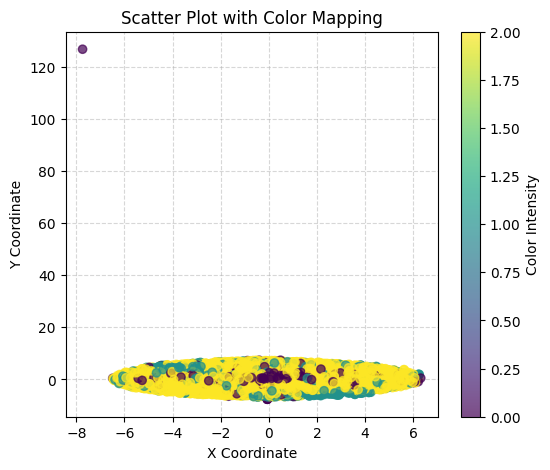

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_embedded is a 2D array or DataFrame with shape (n_samples, 2)
# and df1[0] is a list or array of colors with length n_samples

# Extract x and y coordinates
x = X_embedded[:, 0]
y = X_embedded[:, 1]

# Create the scatter plot
fig, ax = plt.subplots(figsize=(6, 5))  # Set the figure size to match the width and height in Plotly
scatter = ax.scatter(x, y, c=df1[0], cmap='viridis', alpha=0.7)  # Use a colormap and set transparency

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Color Intensity')

# Add axis labels and a title
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Scatter Plot with Color Mapping')

# Improve the grid and axis appearance
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_axisbelow(True)

# Show the plot
plt.show()

In [21]:
X_train = X_train.reshape(-1, 19,1024, 1)
X_test = X_test.reshape(-1, 19, 1024, 1)
X_train.shape

(15340, 19, 1024, 1)

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import sys,os,cv2
import tensorflow as tf
from keras.layers import Conv2D, Add, MaxPooling2D, AveragePooling2D, Activation, Dense, PReLU, Layer, DepthwiseConv2D
from keras.layers import Input, BatchNormalization, GlobalAveragePooling2D, Concatenate, Cropping2D, Multiply, Lambda, Flatten, Reshape
from keras.activations import relu, softmax, sigmoid, tanh, leaky_relu
from keras import initializers
from keras.models import Model
from keras.regularizers import l2
import keras.backend as K
import h5py

from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model, Model

In [23]:
def channel_split(x):
    split_0 = x[:, :, :, :x.shape[-1] // 2]
    split_1 = x[:, :, :, x.shape[-1] // 2:]
    return split_0, split_1

In [24]:
def Channel_attention(a1):
    split_0, split_1 = channel_split(a1)
    Conv3 = Conv2D(filters=64, kernel_size=(1, 3), dilation_rate = 1, padding = 'same', activation='relu')(split_0)
    Conv3 = BatchNormalization()(Conv3)
    maxi  = Conv2DTranspose(64, (1, 2), strides=(1, 1), padding='same', activation='relu')(Conv3)
    Conv5 = Conv2D(filters=64, kernel_size=(1, 3), dilation_rate = 1, padding = 'same', activation='relu')(maxi)
    Conv5 = BatchNormalization()(Conv5)
    m1    = Multiply()([Conv3, Conv5])
    Conv4 = Conv2D(filters=64, kernel_size=(1, 3), dilation_rate = 1, padding = 'same', activation='relu')(split_1)
    Conv4 = BatchNormalization()(Conv4)
    avg1  = Conv2DTranspose(64, (1, 2), strides=(1, 1), padding='same', activation='relu')(Conv4)
    Conv6 = Conv2D(filters=64, kernel_size=(1, 3), dilation_rate = 1, padding = 'same', activation='relu')(avg1)
    Conv6 = BatchNormalization()(Conv6)
    m2    = Multiply()([Conv6, Conv4])
    g1    = GlobalAveragePooling2D()(m1)
    g2    = GlobalAveragePooling2D()(m2)
    act1  = Activation('sigmoid')(g1)
    act2  = Activation('sigmoid')(g2)
    m3    = Multiply()([m1, act1])
    m4    = Multiply()([m2, act2])
    a4    = Add()([m3, m4])
    return a4

In [25]:
def Spatial_attention(a1):
    split_0, split_1 = channel_split(a1)
    Conv3 = Conv2D(filters=64, kernel_size=(1, 3), dilation_rate = 1, padding = 'same', activation='relu')(split_0)
    Conv3 = BatchNormalization()(Conv3)
    avg   = Conv2DTranspose(64, (1, 2), strides=(1, 1), padding='same', activation='relu')(Conv3)
    Conv5 = Conv2D(filters=64, kernel_size=(1, 3), dilation_rate = 1, padding = 'same', activation='relu')(avg)
    Conv5 = BatchNormalization()(Conv5)
    m1    = Multiply()([Conv3, Conv5])
    Conv4 = Conv2D(filters=64, kernel_size=(1, 3), dilation_rate = 1, padding = 'same', activation='relu')(split_1)
    Conv4 = BatchNormalization()(Conv4)
    avg1  = Conv2DTranspose(64, (1, 2), strides=(1, 1), padding='same', activation='relu')(Conv4)
    Conv6 = Conv2D(filters=64, kernel_size=(1, 3), dilation_rate = 1, padding = 'same', activation='relu')(avg1)
    Conv6 = BatchNormalization()(Conv6)
    m2    = Multiply()([Conv6, Conv4])
    a4    = Add()([m1, m2])
    Conv7 = Conv2D(filters=64, kernel_size=(1, 3), dilation_rate = 1, padding = 'same', activation='relu')(a4)
    Conv7 = BatchNormalization()(Conv7)
    Conv8 = Conv2D(filters=64, kernel_size=(1, 3), dilation_rate = 1, padding = 'same', activation='relu')(Conv7)
    Conv8 = BatchNormalization()(Conv8)
    s1    = Activation('sigmoid')(Conv8)
    return s1

In [26]:
def ASF(in1, in2):
    Conv1 = Conv2D(filters=64, kernel_size=(1, 3), dilation_rate = 1, padding = 'same', activation='relu')(in1)
    Conv1 = BatchNormalization()(Conv1)
    Conv2 = Conv2D(filters=64, kernel_size=(1, 3), dilation_rate = 1, padding = 'same', activation='relu')(in2)
    Conv2 = BatchNormalization()(Conv2)
    a1    = Add()([Conv1, Conv2])
    a4    = Channel_attention(a1)
    a5    = Spatial_attention(a1)
    a6    = Add()([a4, a5])
    a7    = Activation('sigmoid')(a6)
    a8    = Multiply()([a7, Conv1])
    a9    = Multiply()([a7, Conv2])
    a10   = Add()([a8, a9])
    return a10

In [27]:
import tensorflow as tf
def Cosin_similarity(input):
    dot1 = tf.reduce_sum(input[0] * input[1], axis=1)
    dot2 = tf.reduce_sum(input[0] * input[0], axis=1)
    dot3 = tf.reduce_sum(input[1] * input[1], axis=1)
    max_val = tf.maximum(tf.sqrt(dot2 * dot3), tf.keras.backend.epsilon())
    value = dot1 / max_val
    return tf.tanh(value)

In [28]:
def Bund(input):
    alpha_1 = input[0]
    alpha_2 = input[1]

    alpha_l = alpha_1/(alpha_1+alpha_2)
    alpha_g = alpha_2/(alpha_1+alpha_2)

    return alpha_l, alpha_g

In [29]:
from keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop, Adam, Nadam,Adamax,Adadelta
from keras.layers import Input, Conv2D, LSTM, Add, Multiply, Concatenate, MaxPooling2D, AveragePooling2D, Flatten, Lambda
from keras.layers import SeparableConv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, GlobalMaxPooling2D, BatchNormalization, Conv2DTranspose
eps = 1.1e-5
input1 = Input((19, 1024, 1))

x = Conv2D(32, (1, 3), padding = 'same', dilation_rate = 1, activation='relu') (input1)
xx = BatchNormalization(axis=-1, epsilon=eps)(x)

x1 = Conv2D(32, (1, 3), padding = 'same', dilation_rate = 1, activation='relu')(x)
x1 = BatchNormalization(axis=-1, epsilon=eps)(x1)

x2 = Conv2D(32, (1, 3), padding = 'same',dilation_rate = 2, activation='relu')(x)
x2 = BatchNormalization(axis=-1, epsilon=eps)(x2)

x3 = Conv2D(32, (1, 3), padding = 'same', dilation_rate = 3, activation='relu')(x)
x3 = BatchNormalization(axis=-1, epsilon=eps)(x3)

x4 = Conv2D(32, (1, 3), padding = 'same', dilation_rate = 4, activation='relu')(x)
x4 = BatchNormalization(axis=-1, epsilon=eps)(x4)


x11 = Conv2D(32, (1, 3), padding = 'same', dilation_rate = 1, activation='relu')(x1)
x11 = BatchNormalization(axis=-1, epsilon=eps)(x11)

x21 = Conv2D(32, (1, 3), padding = 'same', dilation_rate = 2, activation='relu')(x2)
x21 = BatchNormalization(axis=-1, epsilon=eps)(x21)

x31 = Conv2D(32, (1, 3), padding = 'same', dilation_rate = 3, activation='relu')(x3)
x31 = BatchNormalization(axis=-1, epsilon=eps)(x31)

x41 = Conv2D(32, (1, 3), padding = 'same', dilation_rate = 4, activation='relu')(x4)
x41 = BatchNormalization(axis=-1, epsilon=eps)(x41)

a1 = Add()([x1, x11])
a1 = Add()([a1, x])
a2 = Add()([x2, x21])
a2 = Add()([a2, x])
a3 = Add()([x3, x31])
a3 = Add()([a3, x])
a4 = Add()([x4, x41])
a4 = Add()([a4, x])

Att1   = ASF(a1, a2)
Att2   = ASF(a3, a4)

x_l = Att1
x_g = Att2

x_lg = Multiply()([x_l, x_g])
x_gl = Add()([x_l, x_g])
x_c = Concatenate()([x_l, x_g])

x_l = GlobalAveragePooling2D()(x_l)
x_g = GlobalAveragePooling2D()(x_g)
x_c = GlobalAveragePooling2D()(x_c)

x_l = Dense(units=128, activation='relu')(x_l)
x_g = Dense(units=128, activation='relu')(x_g)

share_1 = Dense(units=512, activation='relu')
share_2 = Dense(units=512, activation='relu')

x_l = share_1(x_l)
x_g = share_1(x_g)
x_c = share_1(x_c)

x_l = share_2(x_l)
x_g = share_2(x_g)
x_c = share_2(x_c)

alpha_1 = Lambda(Cosin_similarity, output_shape= (None, 1))([x_l, x_c])
alpha_2 = Lambda(Cosin_similarity, output_shape= (None, 1))([x_g, x_c])
alpha_l, alpha_g = Lambda(Bund)([alpha_1, alpha_2])
out_l = Multiply()([alpha_l, x_l])
out_g = Multiply()([alpha_g, x_g])

out = Concatenate()([out_l, out_g])
# out = Dense(units=512, activation="relu")(out)
out = Dense(units=256, activation="relu")(out)

out = Dense(units=3, activation="softmax")(out)
model = Model(inputs=input1, outputs=out)
opt = Adam(learning_rate=0.001)

model.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 19, 1024,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 19, 1024,  │        128 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 19, 1024,  │      3,104 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 19, 1024,  │      3,104 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 19, 1024,  │      3,104 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 19, 1024,  │      3,104 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 19, 1024,  │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 19, 1024,  │        128 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 19, 1024,  │        128 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 19, 1024,  │        128 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 19, 1024,  │      3,104 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 19, 1024,  │      3,104 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 19, 1024,  │      3,104 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 19, 1024,  │      3,104 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 19, 1024,  │        128 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 19, 1024,  │        128 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 19, 1024,  │        128 │ conv2d_7[0][0]  

 Total params: 929,411 (3.55 MB)

 Trainable params: 925,827 (3.53 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [31]:
input1.shape

(None, 19, 1024, 1)

In [32]:
# model.compile(optimizer= Adam(learning_rate=0.0001, weight_decay = 1e-6), loss='categorical_crossentropy', metrics=['accuracy'])
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(
                              patience=50,
                              min_delta=0.001,
                              monitor="val_accuracy",
                              restore_best_weights=True
                              )
# Define the model checkpoint callback to save the best weights
checkpoint = ModelCheckpoint('/kaggle/working/'+'-{epoch:02d}.keras', monitor='val_accuracy', save_best_only=True)

history = model.fit(X_train, y_train, batch_size= 16, epochs= 20,
                    verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping, checkpoint], shuffle = True)

Epoch 1/20


I0000 00:00:1726585677.895461     330 service.cc:145] XLA service 0x7aa6d80260e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726585677.897098     330 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726585677.897106     330 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1726585698.055887     330 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


959/959 ━━━━━━━━━━━━━━━━━━━━ 478s 453ms/step - accuracy: 0.8594 - loss: 0.3772 - val_accuracy: 0.9525 - val_loss: 0.1127
Epoch 2/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 419s 437ms/step - accuracy: 0.9555 - loss: 0.1188 - val_accuracy: 0.9724 - val_loss: 0.0717
Epoch 3/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 418s 435ms/step - accuracy: 0.9657 - loss: 0.0961 - val_accuracy: 0.9314 - val_loss: 0.1861
Epoch 4/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 418s 436ms/step - accuracy: 0.9666 - loss: 0.0876 - val_accuracy: 0.9748 - val_loss: 0.0726
Epoch 5/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 417s 435ms/step - accuracy: 0.9725 - loss: 0.0670 - val_accuracy: 0.9413 - val_loss: 0.2218
Epoch 6/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 417s 435ms/step - accuracy: 0.9752 - loss: 0.0655 - val_accuracy: 0.9724 - val_loss: 0.0833
Epoch 7/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 418s 435ms/step - accuracy: 0.9768 - loss: 0.0653 - val_accuracy: 0.9742 - val_loss: 0.0717
Epoch 8/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 417s 435ms/step - accuracy: 0.9743 - loss: 0.06

In [33]:
import numpy as np

def get_model_complexity(model):
    trainable_params = np.sum([np.prod(v.shape) for v in model.trainable_weights])
    non_trainable_params = np.sum([np.prod(v.shape) for v in model.non_trainable_weights])
    total_params = trainable_params + non_trainable_params

    # Display parameters in both original and millions
    print(f"Trainable params: {trainable_params:,} ({trainable_params / 1e6:.2f} M)")
    print(f"Non-trainable params: {non_trainable_params:,} ({non_trainable_params / 1e6:.2f} M)")
    print(f"Total params: {total_params:,} ({total_params / 1e6:.2f} M)")

    # Rough estimate of FLOPs
    flops = 2 * total_params  # This is a very rough estimate
    print(f"Estimated FLOPs: {flops:,} ({flops / 1e6:.2f} M)")

    # Estimate of MACs
    macs = total_params  # For fully connected layers, MACs are equal to params
    print(f"Estimated MACs: {macs:,} ({macs / 1e6:.2f} M)")

    return {
        "Trainable params": trainable_params,
        "Non-trainable params": non_trainable_params,
        "Total params": total_params,
        "Estimated FLOPs": flops,
        "Estimated MACs": macs
    }

# Assuming 'model' is your defined and compiled model
try:
    complexity = get_model_complexity(model)
except Exception as e:
    print(f"An error occurred: {e}")
    print("Please ensure your model is correctly defined and compiled.")

Trainable params: 925,827 (0.93 M)
Non-trainable params: 3,584 (0.00 M)
Total params: 929,411 (0.93 M)
Estimated FLOPs: 1,858,822 (1.86 M)
Estimated MACs: 929,411 (0.93 M)


In [34]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Predicting the Test set results
pred = model.predict(X_test)
print("Y_pred:", pred)
print("*****************")
y_pred = np.argmax(pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 193ms/step - accuracy: 0.9953 - loss: 0.0145
Test Loss: 0.016280803829431534
Test Accuracy: 0.9941349029541016
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 244ms/step
Y_pred: [[1.3822190e-08 1.9001816e-06 9.9999809e-01]
 [4.8153263e-11 3.7325469e-07 9.9999964e-01]
 [6.3589916e-13 4.2197311e-08 1.0000000e+00]
 ...
 [1.2094846e-13 1.4926115e-09 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00 6.3771670e-19]
 [1.0000000e+00 1.3201976e-17 3.8055069e-14]]
*****************


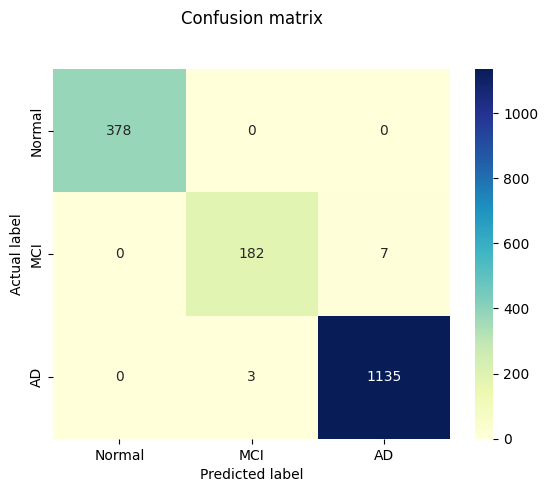

In [44]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
target_names = ['Normal', 'MCI','AD']
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
p = sns.heatmap(pd.DataFrame(cm), annot=True,xticklabels=target_names, yticklabels=target_names, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('/kaggle/working/D1_Task_CM.pdf')

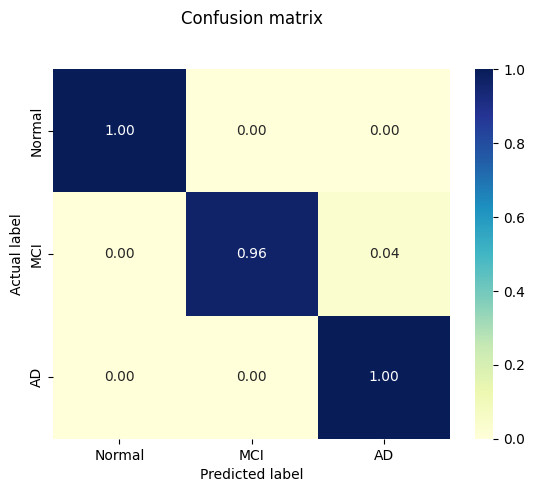

In [45]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
target_names = ['Normal', 'MCI','AD']
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
p = sns.heatmap(pd.DataFrame(cm), annot=True,xticklabels=target_names, yticklabels=target_names, cmap="YlGnBu" ,fmt='.2f')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('/kaggle/working/D1_Task_NCM.pdf')

In [46]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred, target_names = target_names))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       378
         MCI       0.98      0.96      0.97       189
          AD       0.99      1.00      1.00      1138

    accuracy                           0.99      1705
   macro avg       0.99      0.99      0.99      1705
weighted avg       0.99      0.99      0.99      1705



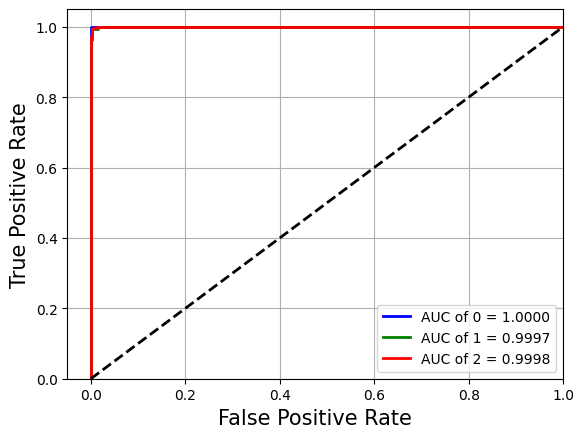

In [47]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors =cycle(['blue', 'green', 'red','darkorange'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='AUC of {0} = {1:0.4f}'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
# plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.grid()
plt.savefig('/kaggle/working/A_ROC.pdf')
plt.show()

In [48]:
for layer in model.layers:
    print(layer.name)

input_layer
conv2d
conv2d_1
conv2d_2
conv2d_3
conv2d_4
batch_normalization_1
batch_normalization_2
batch_normalization_3
batch_normalization_4
conv2d_5
conv2d_6
conv2d_7
conv2d_8
batch_normalization_5
batch_normalization_6
batch_normalization_7
batch_normalization_8
add
add_2
add_4
add_6
add_1
add_3
add_5
add_7
conv2d_9
conv2d_10
conv2d_21
conv2d_22
batch_normalization_9
batch_normalization_10
batch_normalization_21
batch_normalization_22
add_8
add_13
conv2d_15
conv2d_17
conv2d_27
conv2d_29
batch_normalization_15
batch_normalization_17
batch_normalization_27
batch_normalization_29
conv2d_11
conv2d_13
conv2d_transpose_2
conv2d_transpose_3
conv2d_23
conv2d_25
conv2d_transpose_6
conv2d_transpose_7
batch_normalization_11
batch_normalization_13
conv2d_16
conv2d_18
batch_normalization_23
batch_normalization_25
conv2d_28
conv2d_30
conv2d_transpose
conv2d_transpose_1
batch_normalization_16
batch_normalization_18
conv2d_transpose_4
conv2d_transpose_5
batch_normalization_28
batch_normalization_3

In [49]:
from keras.models import Model
model = model
layer_name = 'dense_4'  # Put the 2nd last layer of the above output
intermediate_layer_model = Model(inputs = model.input, outputs = model.get_layer(layer_name).output)
intermediate_output1 = intermediate_layer_model.predict([X_train])

import numpy as np
import pandas as pd
np.savetxt("/kaggle/working/A_X_train_Proposed_Feature.csv", intermediate_output1, delimiter = ",")

df2 = pd.read_csv("/kaggle/working/A_X_train_Proposed_Feature.csv", header = None, delimiter = ",")

import numpy as np
from sklearn.manifold import TSNE
X1 = np.array(df2)
X_embedded1 = TSNE(n_components=2).fit_transform(X1)

480/480 ━━━━━━━━━━━━━━━━━━━━ 99s 202ms/step


In [50]:
import plotly.express as px
fig = px.scatter(X_embedded1, x =0, y = 1, color=df1[0], width=600, height=500)
fig.show()

**END, THANK YOU!**